In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LW=load_wine()
df_wine=pd.DataFrame(data=LW.data,columns=LW.feature_names)
df_wine.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


# Histograma

<Axes: >

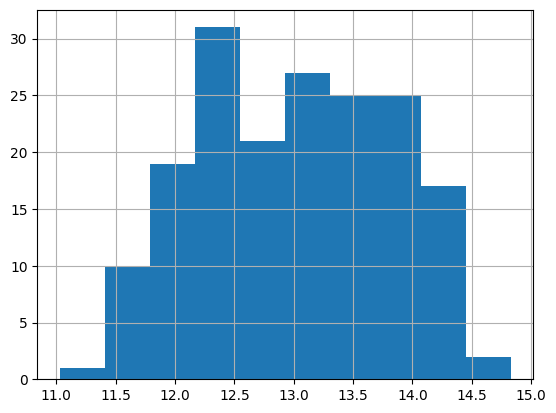

In [2]:
df_wine['alcohol'].hist()

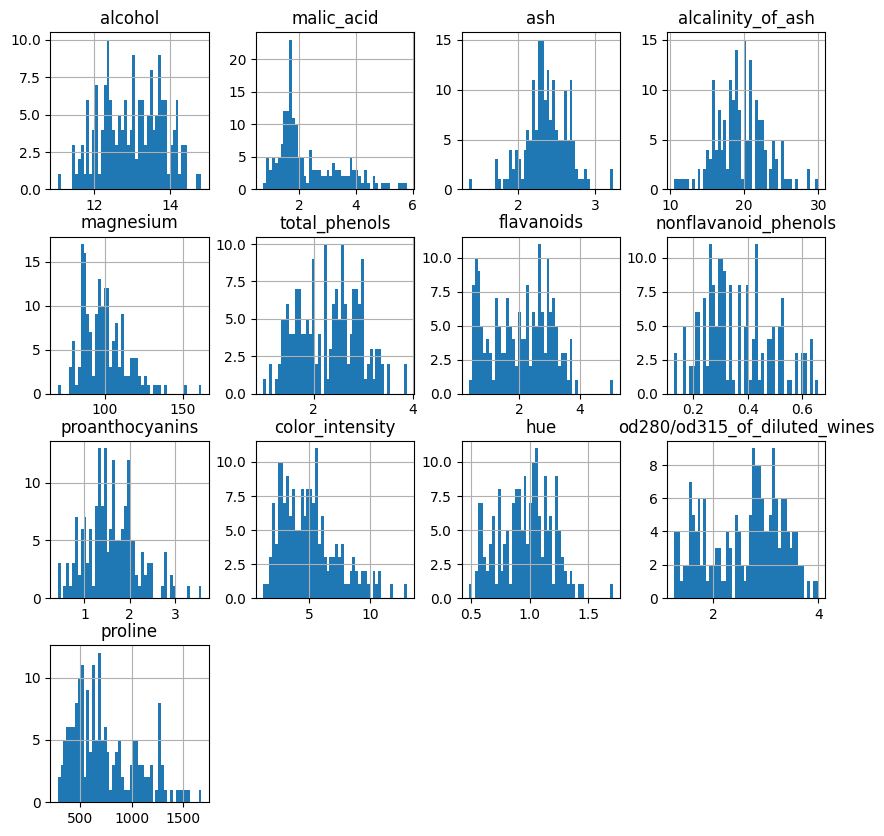

In [3]:
h=df_wine.hist(figsize=(10,10),bins=50) # figsize  ->  tamaño de la imagen en "pulgadas"
                                        # bins     ->  número de contenedores por gráfico (mayor resolución)
# plt.tight_layout()                    # Acomoda las etiquetas ;)

(array([ 1.,  0.,  4.,  6.,  8., 11., 14., 17., 10., 11., 15., 12., 12.,
        13., 18.,  7., 11.,  6.,  0.,  2.]),
 array([11.03, 11.22, 11.41, 11.6 , 11.79, 11.98, 12.17, 12.36, 12.55,
        12.74, 12.93, 13.12, 13.31, 13.5 , 13.69, 13.88, 14.07, 14.26,
        14.45, 14.64, 14.83]),
 <BarContainer object of 20 artists>)

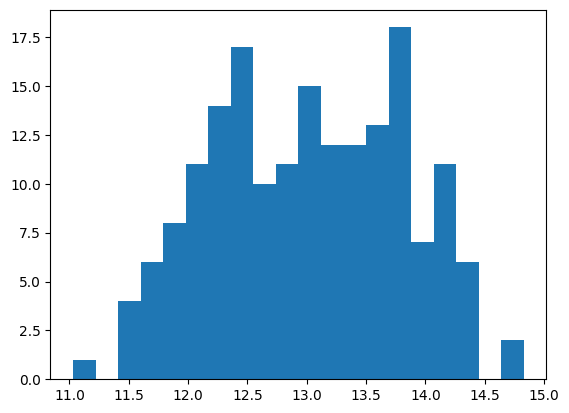

In [4]:
plt.hist(df_wine['alcohol'],bins=20) # Desde matplotlib, la función hist() nos regresa el número de elementos por contenedor y
                                     # Los límites de los contenedores

# Medidas de posición

In [5]:
#@title Media aritmética
#
# Desde numpy
np.mean(df_wine['alcohol'])

13.00061797752809

In [6]:
np.mean(df_wine,axis=0) # axis=0  ->  hace el barrido por filas (axis=1, lo hace por columnas)

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [7]:
# Desde pandas
df_wine['alcohol'].mean()

13.00061797752809

In [8]:
df_wine.mean()

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [9]:
#@title Media recortada
from scipy import stats

In [10]:
# stats.tmean? # Calcula la media aitmética resultante de recortar límites inferior y superior en la variable

In [11]:
stats.tmean(df_wine.alcohol,(12,14))

12.983576642335766

In [12]:
# stats.trim_mean? # Calcula la media aritmética de la variable resultante de recortar un porcentaje de los datos de manera simétrica

In [13]:
stats.trim_mean(df_wine.alcohol,0.1) # Eliminamos el 10% de los datos más pequeños y el 10% de los datos más grandes

13.006388888888889

In [14]:
df_wine.alcohol.mean()

13.00061797752809

In [15]:
#@title Media ponderada
# np.average?

In [16]:
np.average(df_wine['alcohol']) # media aritmética

13.00061797752809

In [17]:
df_wine.alcohol.shape

(178,)

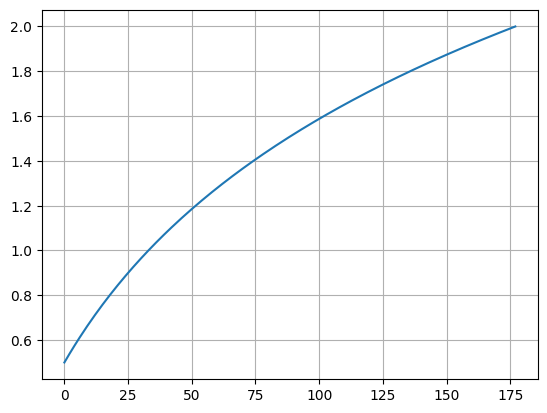

In [18]:
w=np.log(np.linspace(np.exp(0.5),np.exp(2),178)) # Ponderación a las observaciones de 'alcohol'
plt.plot(w)
plt.grid()

In [19]:
np.average(df_wine.alcohol,weights=w)

12.894300876627135

In [20]:
#@title Media geométrica
# stats.gmean?

In [21]:
gm=stats.gmean(df_wine)
gm

array([1.29752784e+01, 2.10655027e+00, 2.35006078e+00, 1.92047930e+01,
       9.87945076e+01, 2.20614882e+00, 1.72633531e+00, 3.40592502e-01,
       1.48269582e+00, 4.56323347e+00, 9.28760027e-01, 2.50412397e+00,
       6.85605753e+02])

In [22]:
m=np.mean(df_wine,axis=0)
m

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [23]:
(m>gm).sum()

13

In [24]:
m.shape

(13,)

In [25]:
#@title Media armónica
# stats.hmean?

In [26]:
hm=stats.hmean(df_wine)
hm

array([1.29498207e+01, 1.91402549e+00, 2.33268680e+00, 1.89038316e+01,
       9.79056615e+01, 2.11425211e+00, 1.39305807e+00, 3.19560143e-01,
       1.36201459e+00, 4.10641888e+00, 8.98573781e-01, 2.38715250e+00,
       6.30550129e+02])

In [27]:
(hm>gm).sum()

0

In [28]:
#@title Mediana
np.median(df_wine,axis=0) # A partir de numpy

array([1.305e+01, 1.865e+00, 2.360e+00, 1.950e+01, 9.800e+01, 2.355e+00,
       2.135e+00, 3.400e-01, 1.555e+00, 4.690e+00, 9.650e-01, 2.780e+00,
       6.735e+02])

In [29]:
df_wine.median() # a partir de pandas

alcohol                          13.050
malic_acid                        1.865
ash                               2.360
alcalinity_of_ash                19.500
magnesium                        98.000
total_phenols                     2.355
flavanoids                        2.135
nonflavanoid_phenols              0.340
proanthocyanins                   1.555
color_intensity                   4.690
hue                               0.965
od280/od315_of_diluted_wines      2.780
proline                         673.500
dtype: float64

In [30]:
#@title Moda
# stats.mode?

In [31]:
stats.mode(df_wine.alcohol) # Muestra la incidencia más pequeña con mayor frecuencia y cuantas veces está presente

ModeResult(mode=12.37, count=6)

In [32]:
df_wine.alcohol.mode()      # Muestra todas las incidencias que más se repiten

0    12.37
1    13.05
Name: alcohol, dtype: float64

In [33]:
#@title Cuantil o percentil
np.quantile(df_wine['alcohol'],0.25)

12.362499999999999

In [34]:
np.quantile(df_wine['alcohol'],[0.25,0.5,0.75])

array([12.3625, 13.05  , 13.6775])

In [35]:
np.quantile(df_wine,[0.25,0.5,0.75],axis=0)

array([[1.23625e+01, 1.60250e+00, 2.21000e+00, 1.72000e+01, 8.80000e+01,
        1.74250e+00, 1.20500e+00, 2.70000e-01, 1.25000e+00, 3.22000e+00,
        7.82500e-01, 1.93750e+00, 5.00500e+02],
       [1.30500e+01, 1.86500e+00, 2.36000e+00, 1.95000e+01, 9.80000e+01,
        2.35500e+00, 2.13500e+00, 3.40000e-01, 1.55500e+00, 4.69000e+00,
        9.65000e-01, 2.78000e+00, 6.73500e+02],
       [1.36775e+01, 3.08250e+00, 2.55750e+00, 2.15000e+01, 1.07000e+02,
        2.80000e+00, 2.87500e+00, 4.37500e-01, 1.95000e+00, 6.20000e+00,
        1.12000e+00, 3.17000e+00, 9.85000e+02]])

In [36]:
df_wine.quantile([0.25,0.5,0.75])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0.25,12.3625,1.6025,2.2100,17.2,88.0,1.7425,1.205,0.2700,1.250,3.22,0.7825,1.9375,500.5
0.50,13.0500,1.8650,2.3600,19.5,98.0,2.3550,2.135,0.3400,1.555,4.69,0.9650,2.7800,673.5
0.75,13.6775,3.0825,2.5575,21.5,107.0,2.8000,2.875,0.4375,1.950,6.20,1.1200,3.1700,985.0


In [37]:
np.percentile(df_wine.alcohol,25)

12.362499999999999

# Medidas de disperción

In [38]:
#@title varianza y desviación estándar
#
# Usando numpy
np.var(df_wine['alcohol']) # Cálculo poblacional

0.6553597304633255

In [39]:
df_wine['alcohol'].var() # Cálculo muestral (ligeramente mashor)

0.6590623278105759

In [40]:
df_wine['alcohol'].var(ddof=0)

0.6553597304633255

In [41]:
np.sqrt(np.var(df_wine['alcohol']))

0.8095429145285168

In [42]:
np.std(df_wine['alcohol'])

0.8095429145285168

In [43]:
df_wine['alcohol'].std()

0.8118265380058575

In [44]:
df_wine['alcohol'].std(ddof=0)

0.8095429145285168

In [45]:
#@title Rango
np.max(df_wine['alcohol'])-np.min(df_wine['alcohol'])

3.8000000000000007

In [46]:
X=df_wine['alcohol']
X.max()-X.min()

3.8000000000000007

In [47]:
np.ptp(X)

3.8000000000000007

In [49]:
np.ptp(df_wine,axis=0)

alcohol                            3.80
malic_acid                         5.06
ash                                1.87
alcalinity_of_ash                 19.40
magnesium                         92.00
total_phenols                      2.90
flavanoids                         4.74
nonflavanoid_phenols               0.53
proanthocyanins                    3.17
color_intensity                   11.72
hue                                1.23
od280/od315_of_diluted_wines       2.73
proline                         1402.00
dtype: float64

In [52]:
#@title Rango intercuartílico
#
# Desde numpy
Q=np.quantile(X,[0.25,0.75])
Q

array([12.3625, 13.6775])

In [54]:
iqr=Q[1]-Q[0]
iqr

1.3150000000000013

In [55]:
# Desde pandas
Q=X.quantile([0.25,0.75])
Q

0.25    12.3625
0.75    13.6775
Name: alcohol, dtype: float64

In [56]:
Q[0.75]-Q[0.25]

1.3150000000000013

In [57]:
# Todas las variables con numpy
Q=np.quantile(df_wine,[0.25,0.75],axis=0)
Q.shape

(2, 13)

In [60]:
Q[1]-Q[0]

array([1.3150e+00, 1.4800e+00, 3.4750e-01, 4.3000e+00, 1.9000e+01,
       1.0575e+00, 1.6700e+00, 1.6750e-01, 7.0000e-01, 2.9800e+00,
       3.3750e-01, 1.2325e+00, 4.8450e+02])

In [61]:
# Todas las variables con pandas
Q=df_wine.quantile([0.25,0.75])
Q

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0.25,12.3625,1.6025,2.2100,17.2,88.0,1.7425,1.205,0.2700,1.25,3.22,0.7825,1.9375,500.5
0.75,13.6775,3.0825,2.5575,21.5,107.0,2.8000,2.875,0.4375,1.95,6.20,1.1200,3.1700,985.0


In [ ]:
Q.loc[0.75]-Q.loc[0.25] # loc  ->  se especifica el nombre del index

In [ ]:
Q.iloc[1]-Q.iloc[0]     # iloc  ->  se especifica la posición del index

In [65]:
# Desde stats
stats.iqr(X)

1.3150000000000013

In [66]:
stats.iqr(df_wine,axis=0)

array([1.3150e+00, 1.4800e+00, 3.4750e-01, 4.3000e+00, 1.9000e+01,
       1.0575e+00, 1.6700e+00, 1.6750e-01, 7.0000e-01, 2.9800e+00,
       3.3750e-01, 1.2325e+00, 4.8450e+02])

In [ ]:
#@title Coeficiente de variación de Pearson
s=np.std(df_wine,axis=0)
s

In [ ]:
nm=np.abs(np.mean(df_wine,axis=0))
nm

In [ ]:
s/nm

In [ ]:
df_wine[['malic_acid','proline']].hist()

In [71]:
stats.variation(df_wine)

array([0.06226957, 0.47681402, 0.11560124, 0.17082223, 0.14279209,
       0.27192157, 0.4908411 , 0.34296507, 0.35875872, 0.45704302,
       0.23805811, 0.27108673, 0.42043713])

# Medidas de forma

In [72]:
#@title Sesgo
X.skew()

-0.051482331077134784

In [ ]:
X.hist()

In [74]:
df_wine.skew()

alcohol                        -0.051482
malic_acid                      1.039651
ash                            -0.176699
alcalinity_of_ash               0.213047
magnesium                       1.098191
total_phenols                   0.086639
flavanoids                      0.025344
nonflavanoid_phenols            0.450151
proanthocyanins                 0.517137
color_intensity                 0.868585
hue                             0.021091
od280/od315_of_diluted_wines   -0.307285
proline                         0.767822
dtype: float64

In [ ]:
H=df_wine[['magnesium','color_intensity','od280/od315_of_diluted_wines']].hist()

In [78]:
#@title Curtósis
X.kurt() # Función de densidad más achatada que la Normal

-0.8524995684849164

In [ ]:
df_wine.kurt()

In [ ]:
H=df_wine[['alcohol','ash']].hist()